In [1]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import r2_score

df = pd.read_csv("FINAL_TRUST.csv")

#x = df[['total_responses_weight']].values
x = df[['comments', 'comment_likes', 'LIKE', 'LOVE', 'SAD', 'ANGRY', 'WOW', 'HAHA', 'THANKFUL']].values
y = df['TRUST'].values

#Split the dataset in training/test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

scaler = StandardScaler()

#Train the model on the training set
normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train))
reg = LinearRegression()
reg.fit(normalized_x_train, y_train)

#Predict the test set results
normalized_x_test = pd.DataFrame(scaler.transform(x_test))
y_test_pred = reg.predict(normalized_x_test)
#print(y_test_pred)

In [2]:
#t = reg.predict([[0.75]])
t = reg.predict([[3.0,2.0,0,0,0,0,0,0,0]])
print(t)

[3.15179968]


In [3]:
#Evaluate my model
from sklearn.metrics import r2_score
r2_score(y_test,y_test_pred)

0.9840607168673241

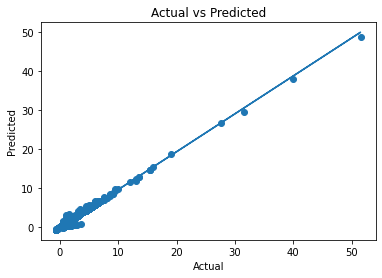

In [4]:
#Plot the results
import matplotlib.pyplot as plt
from scipy import stats
#plt.figure(figsize=(15,10))
slope, intercept, r, p, std_err = stats.linregress(y_test, y_test_pred)

def myfunc(y_test):
    return slope * y_test + intercept

mymodel = list(map(myfunc, y_test))

plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.plot(y_test, mymodel)
plt.show()

In [5]:
pred_y_df=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_test_pred, 'Difference': y_test-y_test_pred })
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,0.3333,0.227636,0.105664
1,0.5000,0.564835,-0.064835
2,0.1667,0.130972,0.035728
3,0.1667,0.161727,0.004973
4,0.5000,0.564835,-0.064835
5,0.1667,0.161727,0.004973
6,0.1667,0.161727,0.004973
7,0.1667,0.161727,0.004973
8,0.5000,0.564835,-0.064835
9,0.3333,0.166125,0.167175
